In [1]:
import os

experiment_path = './data/Map Wall Experiment #2'

if not os.path.exists(experiment_path):
    os.makedirs(experiment_path)

In [2]:
from map_maker import cluttered_map, save_map, wall_map
from Turtlebot_Kinematics import unicycleKin
from environment import Environment, load_ENV
from Runner import ControllMode, Runner
from pso_controller import Multi_PSO_Controller
from dwa_controller import DWA_Controller

kinematic = unicycleKin()
run_len = 31
dt = 0.1
max_index = None

# map parameters
map_obs = 8
map_size = 50
map_unknown = False

for i in range(run_len):
    run_path = f"{experiment_path}/{i}"
    if not os.path.exists(run_path):
        os.makedirs(run_path)

    run_map = wall_map(40, 46 - 3*i)
    map_name = f"wall_{40}height_{46-3*i}depth"
    map_path = f"{run_path}/{map_name}"
    save_map(run_map, map_name, run_path)


    MultiPSO_ENV = Environment.from_dict(run_map, kinematic, record=True)
    MultiPSO_controller = Multi_PSO_Controller(10, kinematic, 5, 1.5, 10)
    if max_index is None:
        max_index = MultiPSO_ENV.goal_travel_time / dt + 200
    else: assert max_index == MultiPSO_ENV.goal_travel_time / dt + 200
    MultiPSO_Runner = Runner(
        MultiPSO_ENV, 
        ControllMode.MultiPSO, 
        MultiPSO_controller, 
        max_step = max_index,
        dt = dt,
        save_path= f"{run_path}/MultiPSO_data"
    )
    MultiPSO_Runner.loop()

    DWA_ENV = Environment.from_dict(run_map, kinematic, record=True)
    DWA_controller = DWA_Controller(20, kinematic, virtual_dt=2.0)
    DWA_Runner = Runner(
        DWA_ENV, 
        ControllMode.DWA, 
        DWA_controller, 
        max_step = max_index,
        dt = dt,
        save_path= f"{run_path}/DWA_data"
    )
    DWA_Runner.loop()


pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
# 1
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9
# 10
# 11
# 12
# 13
# 14
# 15
# 16
# 17
# 18
# 19
# 20
# 21
# 22
# 23
# 24
# 25
# 26
# 27
# 28
# 29
# 30
# 31
# 32
# 33
# 34
# 35
# 36
# 37
# 38
# 39
# 40
# 41
# 42
# 43
# 44
# 45
# 46
# 47
# 48
# 49
# 50
# 51
# 52
# 53
# 54
# 55
# 56
# 57
# 58
# 59
# 60
# 61
# 62
# 63
# 64
# 65
# 66
# 67
# 68
# 69
# 70
# 71
# 72
# 73
# 74
# 75
# 76
# 77
# 78
# 79
# 80
# 81
# 82
# 83
# 84
# 85
# 86
# 87
# 88
# 89
# 90
# 91
# 92
# 93
# 94
# 95
# 96
# 97
# 98
# 99
# 100
# 101
# 102
# 103
# 104
# 105
# 106
# 107
# 108
# 109
# 110
# 111
# 112
# 113
# 114
# 115
# 116
# 117
# 118
# 119
# 120
# 121
# 122
# 123
# 124
# 125
# 126
# 127
# 128
# 129
# 130
# 131
# 132
# 133
# 134
# 135
# 136
# 137
# 138
# 139
# 140
# 141
# 142
# 143
# 144
# 145
# 146
# 147
# 148
# 149
# 150
# 151
# 152
# 153
# 154
# 155
# 156
# 157
# 158
# 159
# 160
# 161
# 162
# 163
# 164
# 165
# 16

In [3]:
import numpy as np

max_index = int(np.ceil(max_index))
print("Max_index:", max_index)


Max_index: 567


In [4]:
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt

In [5]:
def fill_df(df, length, di):
    index = df.index[-1]
    last_loc = df.iloc[-1]
    while len(df) < length:
        index += di
        df.loc[index] = last_loc
    return df

def build_loc(goal_dists, obst_dists):
    return {
        "goal_dists": goal_dists,
        "obst_dists": obst_dists
    }

In [6]:

Multi_PSO_df = DataFrame(columns=["goal_dists", "obst_dists"])
DWA_df = DataFrame(columns=["goal_dists", "obst_dists"])

def append_to_total_df(total_df, file_name, max_index, dt):
    df = pandas.read_hdf(file_name)
    goal_dists = fill_df(df["goal_dist"], max_index, dt)
    obst_dists = fill_df(df["obst_dist"], max_index, dt)
    total_df.loc[i] = build_loc(goal_dists, obst_dists)

for i in range(run_len):
    append_to_total_df(Multi_PSO_df, f"{experiment_path}/{i}/MultiPSO_data.h5", max_index, dt)
    append_to_total_df(DWA_df, f"{experiment_path}/{i}/DWA_data.h5", max_index, dt)
    



In [7]:
import numpy as np

def get_eval_arrays(total_df, max_index):
    print(total_df.iloc[0])
    avg_goal = list([np.average([total_df.iloc[i]["goal_dists"].iloc[j] for i in range(run_len)])for j in range(max_index)])
    avg_obst = list([np.average([total_df.iloc[i]["obst_dists"].iloc[j] for i in range(run_len)])for j in range(max_index)])
    min_obst = list([np.min([total_df.iloc[i]["obst_dists"].iloc[j] for i in range(run_len)])for j in range(max_index)])
    return avg_goal, avg_obst, min_obst


goal_dists    0.0      0.000000
0.1      0.105394
0.2      0...
obst_dists    0.0     3.125000
0.1     3.216805
0.2     3.31...
Name: 0, dtype: object
goal_dists    0.0       0.000000
0.1       0.128855
0.2     ...
obst_dists    0.0     3.125000
0.1     3.218278
0.2     3.31...
Name: 0, dtype: object


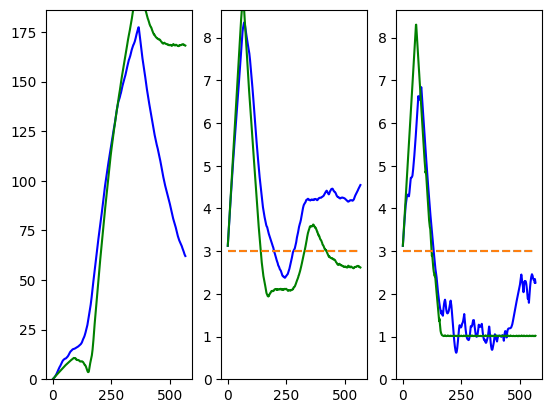

In [10]:
def plot_eval_row(axs, total_df, color="blue"):
    avg_goal, avg_obst, min_obst = get_eval_arrays(total_df, max_index)
    axs[0].plot(avg_goal, color=color)
    axs[1].plot(avg_obst, color=color)
    axs[1].plot([3]*len(avg_obst), linestyle="--")
    axs[2].plot(min_obst, color=color) 
    axs[2].plot([3]*len(min_obst), linestyle="--")
    axs[2].set_ylim(top = axs[1].get_ylim()[1])
    for ax in axs:
        ax.set_ylim(bottom = 0.0)

fig, axs = plt.subplots(1,3)
plot_eval_row(axs, Multi_PSO_df, "blue")
plot_eval_row(axs, DWA_df, "green")


In [9]:
df = pandas.read_hdf("data\Map Experiment #2\9\DWA_data.h5")
print(df)
max_index

          robo_x      robo_y  robo_deg      goal_x  goal_y   goal_dist  \
0.0    50.000000  300.000000  0.000000   50.000000   300.0    0.000000   
0.1    51.542745  299.996242 -0.004872   51.363636   300.0    0.179148   
0.2    53.018691  299.999993 -0.009533   52.727273   300.0    0.291418   
0.3    54.449510  300.010400 -0.014051   54.090909   300.0    0.358752   
0.4    55.960577  300.028028 -0.018823   55.454545   300.0    0.506807   
...          ...         ...       ...         ...     ...         ...   
56.3  279.024862  305.335500 -0.226861  550.000000   300.0  271.027660   
56.4  279.102567  305.357246 -0.134841  550.000000   300.0  270.950400   
56.5  279.183546  305.364430 -0.227553  550.000000   300.0  270.869579   
56.6  279.258533  305.385340 -0.138776  550.000000   300.0  270.795021   
56.7  279.340058  305.392869 -0.232144  550.000000   300.0  270.713663   

      obst_dist  
0.0    3.125000  
0.1    3.221422  
0.2    3.313668  
0.3    3.403094  
0.4    3.497536  
...

567